In [1]:
import os
import csv
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

#### Dataset info

In [2]:
# info: https://en.wikipedia.org/wiki/Iris_flower_data_set

#### Loading files & extracting data

In [3]:
iris = datasets.load_iris()
iris_rows = iris.data.astype("float32")
iris_labels = iris.target.astype("float32")

#### Data presentation

In [4]:
rows_to_show = 10

In [5]:
for i in range(0, rows_to_show):
    print("Sample no. " + str(i) + " - " + str(iris_rows[i]))

Sample no. 0 - [ 5.0999999   3.5         1.39999998  0.2       ]
Sample no. 1 - [ 4.9000001   3.          1.39999998  0.2       ]
Sample no. 2 - [ 4.69999981  3.20000005  1.29999995  0.2       ]
Sample no. 3 - [ 4.5999999  3.0999999  1.5        0.2      ]
Sample no. 4 - [ 5.          3.5999999   1.39999998  0.2       ]
Sample no. 5 - [ 5.4000001   3.9000001   1.70000005  0.40000001]
Sample no. 6 - [ 4.5999999   3.4000001   1.39999998  0.30000001]
Sample no. 7 - [ 5.         3.4000001  1.5        0.2      ]
Sample no. 8 - [ 4.4000001   2.9000001   1.39999998  0.2       ]
Sample no. 9 - [ 4.9000001  3.0999999  1.5        0.1      ]


In [6]:
for i in range(0, rows_to_show):
    print("Label no. " + str(i) + " - " + str(iris_labels[i]))

Label no. 0 - 0.0
Label no. 1 - 0.0
Label no. 2 - 0.0
Label no. 3 - 0.0
Label no. 4 - 0.0
Label no. 5 - 0.0
Label no. 6 - 0.0
Label no. 7 - 0.0
Label no. 8 - 0.0
Label no. 9 - 0.0


In [7]:
print("Number of samples: " + str(len(iris_rows)))

Number of samples: 150


#### Divide data:

Classes will be divided so each set contains same amount of each class type.

In [8]:
classes = set(iris_labels)
num_of_classes = len(classes)
print("Detected num of different classes: " + str(num_of_classes))
print(classes)

Detected num of different classes: 3
{0.0, 1.0, 2.0}


In [9]:
samples_divided_by_classes = dict()
for row, label in zip(iris_rows, iris_labels):
    if label not in samples_divided_by_classes.keys():
        samples_divided_by_classes.update({label: list()})
    
    samples_divided_by_classes[label].append(row)

Spliting into train, validation, test sets.

In [10]:
test_samples_ratio = 0.65
val_test_samples_ratio = 0.5

In [11]:
train_rows = list()
val_rows = list()
test_rows = list()

train_labels = list()
val_labels = list()
test_labels = list()

print("Counting number of remaining samples to split: ")
num_of_samples_per_class = list()
for key in samples_divided_by_classes.keys():
    num_of_samples_per_class.append(len(samples_divided_by_classes[key]))
    print("- Class: " + str(key) + ", num samples: " + str(len(samples_divided_by_classes[key])))

print("\nTrimming data: ")
for sample_class in classes:
    trimmed = samples_divided_by_classes[sample_class][:min(num_of_samples_per_class)]
    samples_divided_by_classes[sample_class] = trimmed
    print("- Trimming samples of class '" + str(sample_class) + "'to " 
          + str(min(num_of_samples_per_class)) + ".")


print("\nCreating training set: ")
split_index = int(min(num_of_samples_per_class) * test_samples_ratio)
for sample_class in classes:
    train_rows.extend(samples_divided_by_classes[sample_class][:split_index])
    train_labels = [sample_class for sample in train_rows]
    print("- Adding " + str(len(samples_divided_by_classes[sample_class][:split_index])) 
          + " samples of class '" + str(sample_class) + "' to training set.")
    samples_divided_by_classes[sample_class] = samples_divided_by_classes[sample_class][split_index:]

print("\nCounting number of remaining samples to split: ")
num_of_samples_per_class = list()
for key in samples_divided_by_classes.keys():
    num_of_samples_per_class.append(len(samples_divided_by_classes[key]))
    print("- Class: " + str(key) + ", num samples: " + str(len(samples_divided_by_classes[key])))

print("\nCreating validation and test set: ")
split_index = int(min(num_of_samples_per_class) * val_test_samples_ratio)
for sample_class in classes:
    val_rows.extend(samples_divided_by_classes[sample_class][:split_index])
    val_labels = [sample_class for sample in val_rows]
    print("- Adding " + str(len(samples_divided_by_classes[sample_class][:split_index])) 
          + " samples of class '" + str(sample_class) + "' to validation set.")
    
    test_rows.extend(samples_divided_by_classes[sample_class][split_index:])
    test_labels = [sample_class for sample in test_rows]
    print("- Adding " + str(len(samples_divided_by_classes[sample_class][split_index:])) 
          + " samples of class '" + str(sample_class) + "' to test set.")
    
print("\nConverting types to ndarray.")
train_rows = np.array(train_rows)
val_rows = np.array(val_rows)
test_rows = np.array(test_rows)

train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
test_labels = np.array(test_labels)

Counting number of remaining samples to split: 
- Class: 0.0, num samples: 50
- Class: 1.0, num samples: 50
- Class: 2.0, num samples: 50

Trimming data: 
- Trimming samples of class '0.0'to 50.
- Trimming samples of class '1.0'to 50.
- Trimming samples of class '2.0'to 50.

Creating training set: 
- Adding 32 samples of class '0.0' to training set.
- Adding 32 samples of class '1.0' to training set.
- Adding 32 samples of class '2.0' to training set.

Counting number of remaining samples to split: 
- Class: 0.0, num samples: 18
- Class: 1.0, num samples: 18
- Class: 2.0, num samples: 18

Creating validation and test set: 
- Adding 9 samples of class '0.0' to validation set.
- Adding 9 samples of class '0.0' to test set.
- Adding 9 samples of class '1.0' to validation set.
- Adding 9 samples of class '1.0' to test set.
- Adding 9 samples of class '2.0' to validation set.
- Adding 9 samples of class '2.0' to test set.

Converting types to ndarray.


In [12]:
print("Train data samples: " + str(len(train_rows)))
print("Validation data samples: " + str(len(val_rows)))
print("Test data samples: " + str(len(test_rows)))

Train data samples: 96
Validation data samples: 27
Test data samples: 27


#### KNN

- p=2 which means KNN will use L2 similarity distance

In [13]:
p=2

In [14]:
k_candidates = [number for number in range(1, 16)]

In [15]:
k_results = dict()
for k in k_candidates:
    # Create new classifier with different parameters
    knn = KNeighborsClassifier(p=p, n_neighbors=k)
    knn.fit(train_rows, train_labels)
    
    # Check accuracy for validation set
    predictions = knn.predict(val_rows)
    acc = accuracy_score(predictions, val_labels)
    
    k_results.update({k: acc})

In [16]:
K = max(k_results, key=k_results.get)
print("Best results for K = " + str(K))

Best results for K = 1


In [17]:
knn = KNeighborsClassifier(p=p, n_neighbors=K)
knn.fit(train_rows, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

#### Test

In [18]:
predictions = knn.predict(test_rows)
test_accuracy = accuracy_score(predictions, test_labels)

print("Accuracy for test set: " + str(test_accuracy)) 

Accuracy for test set: 1.0


#### Presenting results

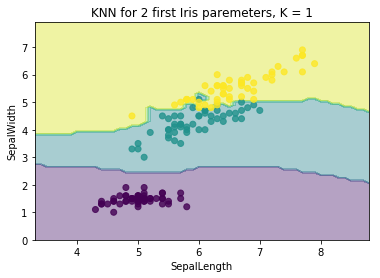

In [19]:
X = iris_rows[:, [0, 2]]
y = iris_labels

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

knn_2features = KNeighborsClassifier(p=p, n_neighbors=K)
knn_2features.fit(X, y)

Z = knn_2features.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array(Z).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")
plt.title("KNN for 2 first Iris paremeters, K = " + str(K))

plt.show()

Results are unclear because to display results on plane only 2 out of 4 paremeters were used. It is not clear enough for KNN how to correctly separate data. K can be increased though to compare tested sample to more train samples.

In [20]:
K = 7

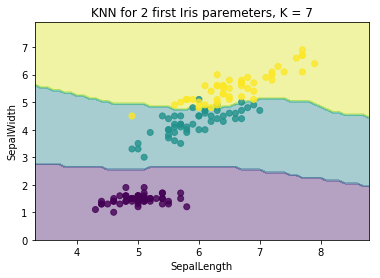

In [21]:
X = iris_rows[:, [0, 2]]
y = iris_labels

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

knn_2features = KNeighborsClassifier(p=p, n_neighbors=K)
knn_2features.fit(X, y)

Z = knn_2features.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array(Z).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")
plt.title("KNN for 2 first Iris paremeters, K = " + str(K))

plt.show()